In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = "https://www.openml.org/data/get_csv/184157/phpfGCaQC.csv"

!wget $data

--2021-10-24 16:52:21--  https://www.openml.org/data/get_csv/184157/phpfGCaQC.csv
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘phpfGCaQC.csv’

phpfGCaQC.csv           [       <=>          ]   2.75M  1.57MB/s    in 1.8s    

2021-10-24 16:52:24 (1.57 MB/s) - ‘phpfGCaQC.csv’ saved [2885823]



#### Read the data and do the basic EDA

In [5]:
df = pd.read_csv('click_data.csv')

In [6]:
df.head()

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
0,0,1,1.071003e+19,8343295,11700,3,3,7702266,21264,27892,1559,0
1,1,1,1.736385e+19,20017077,23798,1,1,93079,35498,4,36476,562934
2,0,1,8.915473e+18,21348354,36654,1,1,10981,19975,36105,33292,11621116
3,0,1,4.426693e+18,20366086,33280,3,3,0,5942,4057,4390,8778348
4,0,1,1.157260e+19,6803526,10790,2,1,9881978,60593,25242,1679,12118311


In [8]:
df.describe()

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
count,39948.000000,39948.000000,3.994800e+04,3.994800e+04,39948.000000,39948.000000,39948.000000,3.994800e+04,3.994800e+04,3.994800e+04,3.994800e+04,3.994800e+04
mean,0.168419,2.100205,9.641350e+18,1.601672e+07,22454.496546,1.960023,1.463853,3.142146e+06,3.519443e+04,1.732829e+05,1.111509e+05,3.669622e+06
std,0.374243,65.867383,4.986705e+18,7.222260e+06,11796.085798,0.715407,0.631545,5.841540e+06,1.009148e+05,4.656748e+05,3.283742e+05,5.492058e+06
min,0.000000,1.000000,4.824369e+14,1.000515e+06,82.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,5.468728e+18,9.027238e+06,13476.500000,1.000000,1.000000,2.364250e+03,3.700000e+02,6.707500e+02,3.560000e+02,1.472250e+03
50%,0.000000,1.000000,1.034947e+19,2.030373e+07,23808.000000,2.000000,1.000000,1.128365e+05,3.389000e+03,1.065400e+04,5.048000e+03,8.883865e+05
75%,0.000000,1.000000,1.434039e+19,2.116392e+07,32124.000000,2.000000,2.000000,3.147909e+06,2.103000e+04,1.002895e+05,5.286175e+04,5.129631e+06
max,1.000000,11820.000000,1.844094e+19,2.222734e+07,39074.000000,3.000000,3.000000,2.624010e+07,1.243163e+06,4.050208e+06,3.171504e+06,2.390734e+07


In [9]:
df.click.isna().sum()

0

In [11]:
df.isna().sum()

click             0
impression        0
url_hash          0
ad_id             0
advertiser_id     0
depth             0
position          0
query_id          0
keyword_id        0
title_id          0
description_id    0
user_id           0
dtype: int64

#### Target variable is click. 
#### Data doesn't seem to have any missing values.

In [12]:
df.click.value_counts()

0    33220
1     6728
Name: click, dtype: int64

#### As we can see above, click 0 has more occurences than click 1. 
#### Note: The original dataset already had this class imbalance and in the downloaded csv, downsampling of the majority class (click=0) has been done so that the target feature is reasonably balanced (5 to 1). 

#### Lets try to do Feature Importance to identify which features are affecting the target variable Click

In [17]:
corr_mat = df.corrwith(df.click)
corr_mat

click             1.000000
impression        0.023876
url_hash         -0.006924
ad_id            -0.015202
advertiser_id    -0.027146
depth            -0.053392
position         -0.123688
query_id         -0.075456
keyword_id        0.027127
title_id          0.012609
description_id    0.004623
user_id           0.078729
dtype: float64

In [19]:
pip install -U imbalanced-learn

     |████████████████████████████████| 189 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
import imblearn
print(imblearn.__version__)

0.8.1


#### Try to predict the accuracy, precision, recall and F1 score in the dataset without applying any imbalance technique

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [23]:
len(df_train), len(df_val), len(df_test)

(23968, 7990, 7990)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train.click.values
y_val = df_val.click.values
y_test = df_test.click.values

del df_train['click']
del df_val['click']
del df_test['click']

### EDA

#### Check the value counts of click variable to understand the imbalance

In [26]:
df_full_train.click.value_counts(normalize=True)

0    0.830621
1    0.169379
Name: click, dtype: float64

#### As you can see above 83% of the data has click 0 and 16% has click 1.

#### Lets try to do Feature Importance to identify which features are affecting the target variable Click

In [28]:
corr_mat = df_full_train.corrwith(df.click).abs()
corr_mat

click             1.000000
impression        0.023952
url_hash          0.008151
ad_id             0.018725
advertiser_id     0.030278
depth             0.052021
position          0.123598
query_id          0.077591
keyword_id        0.030610
title_id          0.015195
description_id    0.007121
user_id           0.079518
dtype: float64

#### Position where the Ad has been displayed seems to be more correlated to the click than other attributes.

### Train a model with LogisticRegression

In [29]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

#### Since column url_hash has very big values and also as we can see from the correlation matrix that its correlation to the target variable is very less (0.008), removing the column for training purpose.

In [49]:
df_train_cpy = df_train.copy()
df_train_cpy.columns

df_train = df_train.drop(['url_hash'],axis=1)



KeyError: "['url_hash'] not found in axis"

In [50]:
df_val_cpy = df_val.copy()
df_val = df_val.drop(['url_hash'],axis=1)

In [51]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
accuracy_score(y_val, y_pred >= 0.5)

0.8369211514392991

In [56]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

scores

0.00 0.163
0.05 0.181
0.10 0.254
0.15 0.450
0.20 0.593
0.25 0.656
0.30 0.745
0.35 0.785
0.40 0.809
0.45 0.827
0.50 0.837
0.55 0.837
0.60 0.837
0.65 0.837
0.70 0.837
0.75 0.837
0.80 0.837
0.85 0.837
0.90 0.837
0.95 0.837
1.00 0.837


[0.16257822277847309,
 0.18135168961201503,
 0.2536921151439299,
 0.45043804755944933,
 0.592866082603254,
 0.6555694618272842,
 0.7451814768460576,
 0.7847309136420526,
 0.8085106382978723,
 0.8266583229036295,
 0.8369211514392991,
 0.83729662077597,
 0.83729662077597,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269]

#### As you can see above, setting the threshold value of 0.5 seems to be the best for predicting accuracy score. 

#### Confusion Table for evaluation

In [81]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[6687,    4],
       [1299,    0]])

#### Dataset seems to have been divided in such a way that true positive value is 0. We need to perform Cross Validation in the dataset to train the model in various different subsets.

In [86]:
from sklearn.metrics import roc_auc_score

In [87]:
roc_auc_score(y_val, y_pred)

0.5633788864639446

#### Though the accuracy score is 83% we see that roc_auc_score is 56% and the Precision and Recall we are unable to calculate properly due to the distribution of the dataset. 

#### Applying Cross-Validation using KFold

In [96]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [97]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [101]:
def precision_and_recall(y_val,y_pred):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    t = 0.5
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    p, r

In [98]:
from sklearn.model_selection import KFold

In [91]:

df_full_train_cpy = df_full_train.copy()
df_full_train = df_full_train.drop(['url_hash'],axis=1)

In [106]:
n_splits = 5

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    precision = []
    recall = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.click.values
        y_val = df_val.click.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        print('C=%s %.6f +- %.6f' % (C, np.mean(scores), np.std(scores)))
    

    

C=0.001 0.568348 +- 0.000000
C=0.001 0.560483 +- 0.007866
C=0.001 0.561084 +- 0.006478
C=0.001 0.564312 +- 0.007920
C=0.001 0.563848 +- 0.007145
C=0.01 0.568362 +- 0.000000
C=0.01 0.560490 +- 0.007872
C=0.01 0.561089 +- 0.006483
C=0.01 0.564317 +- 0.007923
C=0.01 0.563854 +- 0.007147
C=0.1 0.568356 +- 0.000000
C=0.1 0.560487 +- 0.007870
C=0.1 0.561087 +- 0.006481
C=0.1 0.564315 +- 0.007923
C=0.1 0.563851 +- 0.007147
C=0.5 0.568362 +- 0.000000
C=0.5 0.560489 +- 0.007872
C=0.5 0.561089 +- 0.006483
C=0.5 0.564316 +- 0.007923
C=0.5 0.563853 +- 0.007147
C=1 0.568362 +- 0.000000
C=1 0.560490 +- 0.007872
C=1 0.561089 +- 0.006483
C=1 0.564316 +- 0.007923
C=1 0.563852 +- 0.007148
C=5 0.568356 +- 0.000000
C=5 0.560487 +- 0.007870
C=5 0.561093 +- 0.006483
C=5 0.564319 +- 0.007920
C=5 0.563854 +- 0.007145
C=10 0.568362 +- 0.000000
C=10 0.560489 +- 0.007872
C=10 0.561095 +- 0.006485
C=10 0.564321 +- 0.007922
C=10 0.563856 +- 0.007147


#### Most of the C parameter values are almost similar. Hence deciding on C=0.01

In [107]:
dv, model = train(df_full_train, df_full_train.click.values, C=0.01)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.546941570185557

### Prediction accuracy using LogisticRegression = 0.546

#### Training Dataset using Ridge Model

In [108]:
from sklearn.linear_model import Ridge

In [112]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.click.values
y_val = df_val.click.values
y_test = df_test.click.values

del df_train['click']
del df_val['click']
del df_test['click']


In [114]:
df_train_cpy = df_train.copy()
df_train_cpy.columns

df_train = df_train.drop(['url_hash'],axis=1)

df_val_cpy = df_val.copy()
df_val = df_val.drop(['url_hash'],axis=1)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


In [115]:
ridge_model = Ridge(alpha=0, random_state=42)
ridge_model.fit(X_train,y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = ridge_model.predict(X_val)
y_pred

array([0.19499961, 0.18158732, 0.14696818, ..., 0.18989415, 0.11764419,
       0.19259215])

In [116]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [117]:
score_with_alpha_0 = rmse(y_val, y_pred) 
score_with_alpha_0.round(3)

0.49

In [119]:
for a in [0, 0.01, 0.1, 1, 10]:
    ridge_model = Ridge(alpha=a, random_state=42)
    ridge_model.fit(X_train,y_train)
    y_pred = ridge_model.predict(X_val)
    score = rmse(y_val, y_pred)
    print('alpha, score', a, score)

alpha, score 0 0.48964901633762403
alpha, score 0.01 0.4896490148661009
alpha, score 0.1 0.48964900162347835
alpha, score 1 0.48964886930474527
alpha, score 10 0.48964755683318206


#### As you can see above tuning alpha parameter is not having much of a difference in the scores. Hence alpha = 0 is good enough for the Ridge model

In [122]:
df_test_cpy = df_test.copy()
df_test = df_test.drop(['url_hash'],axis=1)

In [123]:
ridge_model = Ridge(alpha=0, random_state=42)
ridge_model.fit(X_train,y_train)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

y_pred = ridge_model.predict(X_test)
y_pred

array([0.0499203 , 0.14773399, 0.15712776, ..., 0.10037121, 0.09295492,
       0.23776941])

In [124]:
score_with_alpha_0_test = rmse(y_test, y_pred) 
score_with_alpha_0_test.round(3)

0.365

### RMSE score with Ridge model was low 0.365

#### Training model with Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [127]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [129]:
y_pred = dt.predict_proba(X_val)[:, 1]
score_depth_1 = roc_auc_score(y_val, y_pred)
score_depth_1

0.5663410537680653

#### Lets tune the max_depth and min_samples_leaf parameter and see if the score improves

In [130]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.566
   2 -> 0.619
   3 -> 0.635
   4 -> 0.649
   5 -> 0.662
   6 -> 0.673
  10 -> 0.647
  15 -> 0.602
  20 -> 0.575
None -> 0.557


#### max_depth = [5, 6]  seems to give better scores. But to prevent overfitting lets take max_depth values [4,5,6] and tune the min_sample_leaf parameter

In [131]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [132]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.649  0.662  0.672
5                 0.649  0.662  0.673
10                0.649  0.663  0.674
15                0.649  0.664  0.675
20                0.649  0.664  0.675
100               0.650  0.664  0.672
200               0.650  0.663  0.672
500               0.651  0.659  0.665

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

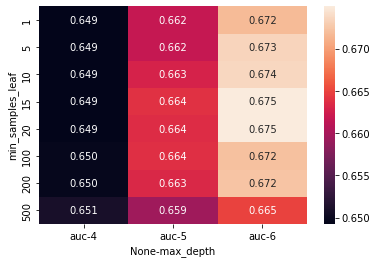

In [133]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


#### As we can see score seems to be more for max_depth=6 and min_samples_leaf = [15, 20]

In [134]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [136]:
print(export_text(dt, feature_names=dv.get_feature_names()))


|--- user_id <= 239403.00
|   |--- impression <= 6.50
|   |   |--- impression <= 1.50
|   |   |   |--- keyword_id <= 357352.00
|   |   |   |   |--- user_id <= 26258.50
|   |   |   |   |   |--- depth <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- depth >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- user_id >  26258.50
|   |   |   |   |   |--- query_id <= 64455.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- query_id >  64455.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- keyword_id >  357352.00
|   |   |   |   |--- user_id <= 60201.00
|   |   |   |   |   |--- description_id <= 11202.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- description_id >  11202.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- user_id >  60201.00
|   |   |   |   |   |--- user_id <= 130287.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- user_id >  130287.00
|   |   |   |   |   |   |--- class: 

In [137]:
y_pred = dt.predict_proba(X_test)[:, 1]
score_with_dt = roc_auc_score(y_test, y_pred)
score_with_dt

0.6857114538385953

### Score with Decision Tree Classifier was 0.685

#### Training Data with RandomForest